## word2vec from scratch 
Adapted from 

https://www.geeksforgeeks.org/implement-your-own-word2vecskip-gram-model-in-python/

In this tutorial we will focus on **skip-gram architecture** for word2vec model. In skip gram architecture of word2vec, the input is the center word and the predictions are the context words. Consider an array of words $W$, if $W(i)$ is the input (center word), then $W(i-2)$, $W(i-1)$, $W(i+1)$, and $W(i+2)$ are the context words, if the sliding window size is 2.

In the example below if our **center word** is brown, then with a window size of 2 our **context words** would be the, quick, fox, jumps.

The input to word2vec is the center word and output we are intersted in predicting are context words.

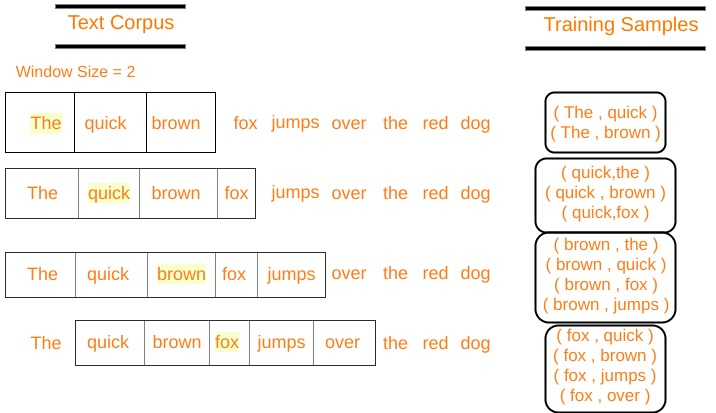

In [10]:
from IPython.display import Image
Image(filename='img_data.jpg')

## Skip-gram architecture

The following image shows the skip-gram architecture that takes a vector of words $V$, multiplies it with it's corresponding weights $W_{VxN}$ to produce hidden dimention (or embedding layer). The output of the embedding layer is further multiplied with another set of weights, $W^{/}_{NxV}$ which is then fed into softmax function to generate probabilities. As visible the size of input and output is same.

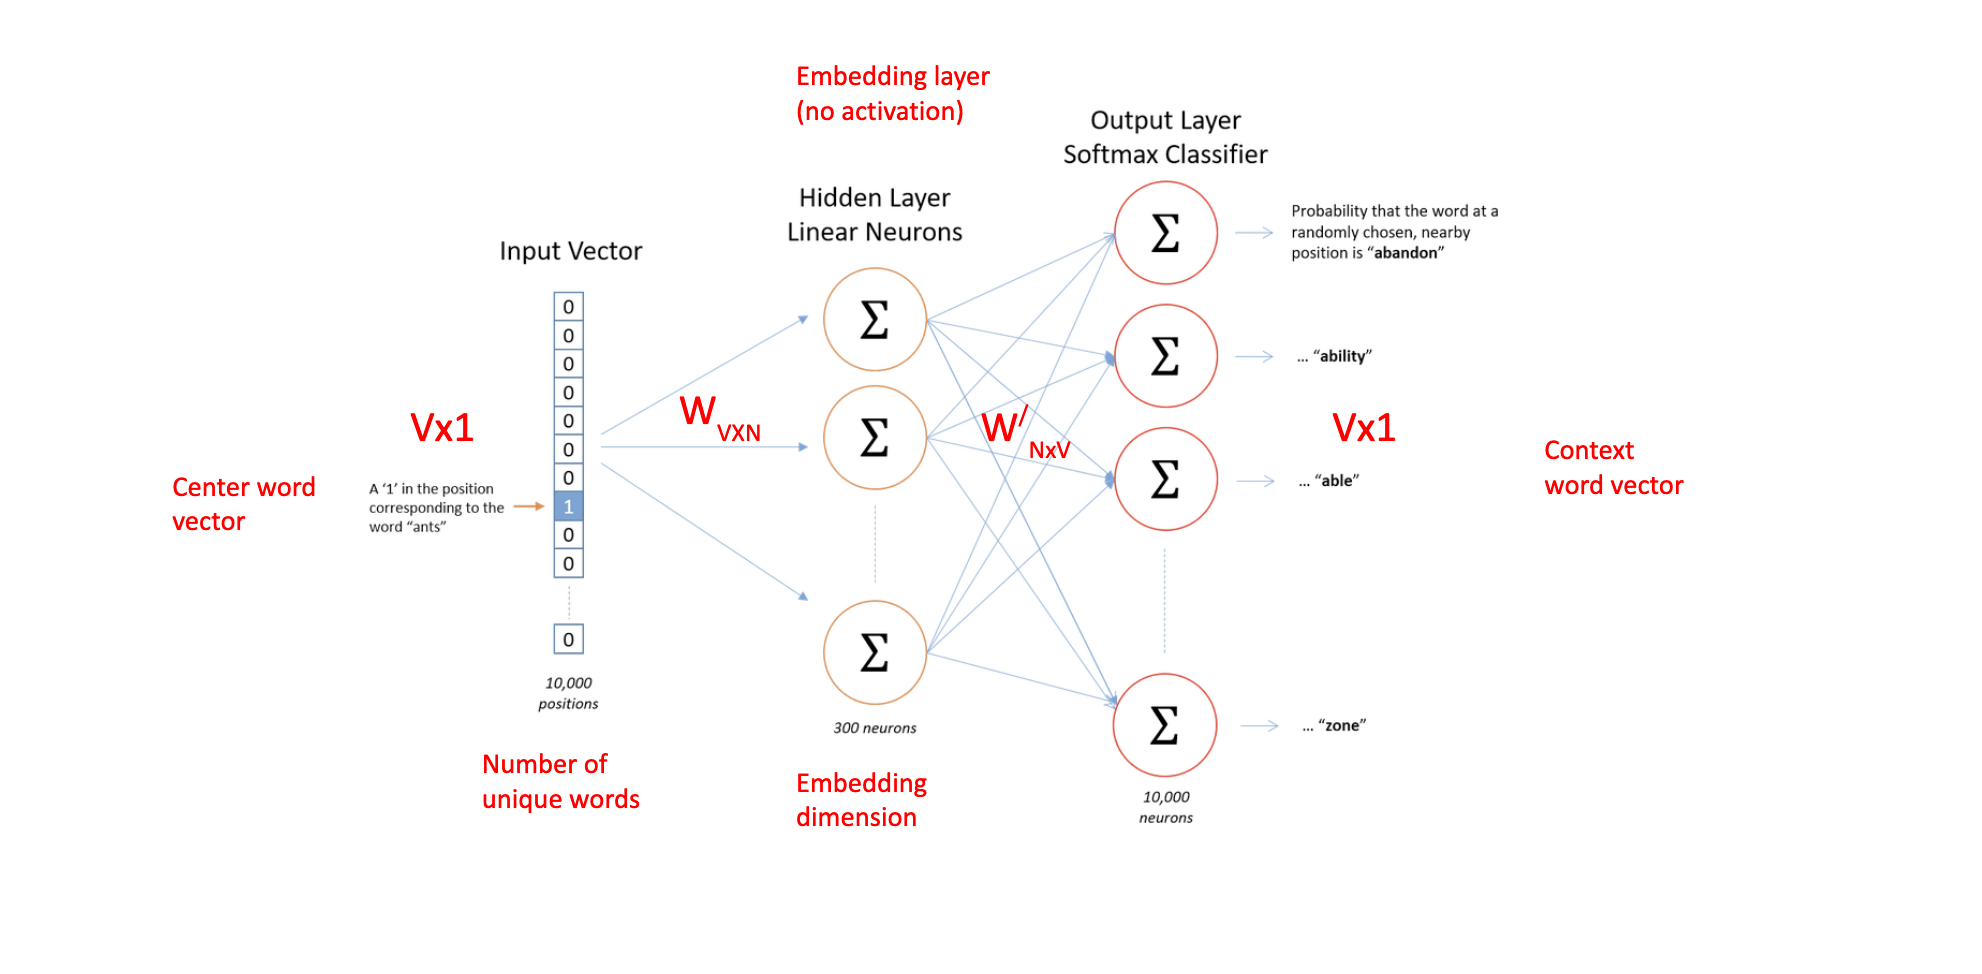

In [24]:
Image(filename='img_skip_gram_net.png')

The architecture above can be re-drawn in matrix form as follows

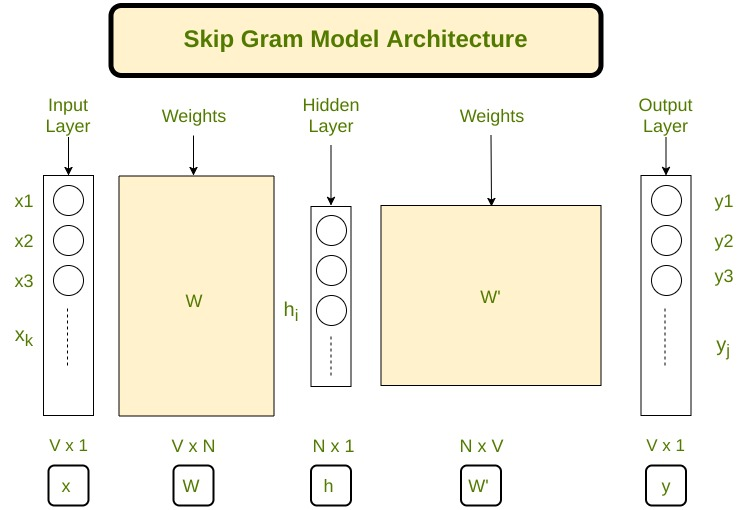

In [23]:
Image(filename='img_img_skip_gram_mat.jpg')

The code to perform matrix multiplications is shown below. The class word2vec defines all the steps in the model. Let's define some mathematical formulations here

## Forward Propogation
Multiplying one hot encoding of centre word (denoted by x) with the first weight matrix $W$ to get hidden layer matrix $h$ (of size N x 1).

$h=W^{T} \cdot x$   -------------- (1)  

here the dimensions are as follows $h_{Vx1} = W^{T}_{NxV}\cdot x_{Vx1}$

Now we multiply the hidden layer vector h with second weight matrix W’ to get a new matrix u

$ u=W^{\prime T} . h$ -------------- (2)

here the dimensions are as follows $u_{Vx1} = W^{\prime T}_{VxN}\cdot h_{Nx1}$

Note that we have to apply a **softmax** to layer $u$ to get our output layer $y$.

Let $u_j$ be $jth$ neuron of layer $u$
Let $w_j$ be the $jth$ word in our vocabulary where $j$ is any index
Let $V_{wj}$ be the $jth$ column of matrix $W^{\prime}$(column corresponding to a word $w_j$)

$u_{j}=V_{w_{i j}}^{T} . h$ 

here the dimensions are as follows $u_{1x1}=V^{T}_{wij} \cdot h_{Nx1}$

$y = softmax(u)$
$y_j = softmax(u_j)$ ----------- (3)
$y_j$ denotes the probability that $w_j$ is a context word

$P\left(w_{j} | w_{i}\right)=y_{j}=\frac{e^{u_{j}}}{\sum_{j^{\prime}=1}^{v} e^{u_{j^{\prime}}}}$

$P(w_j|w_i)$ is the probability that $w_j$ is a context word, given $w_i$ is the input word.

Thus, our goal is to maximise $P( wj* | wi )$, where $j*$ represents the indices of context words

Clearly we want to maximise

$\prod_{c=1}^{C} \frac{e^{u_{j_{c}}}}{\sum_{j^{\prime}=1}^{v} e^{u_{j^{\prime}}}}$

where $j*_c$ are the vocabulary indexes of context words . Context words range from c = 1, 2, 3..C
Let’s take a **negative log likelihood** of this function to get our loss function, which we want to minimise

$E=-\log \left\{\prod_{c=1}^{C} \frac{e^{u_{j c}}}{\sum_{j^{\prime}=1}^{v} e^{u_{j^{\prime}}}}\right\}$ 

E is the loss function

Let $t$ be actual output vector from our training data, for a particular centre word. It will have 1’s at the positions of context words and 0’s at all other places. $t_{j*c}$ are the 1’s of the context words.
We can multiply $u_{j_{c}}^{*}$ with $t_{j c}^{*}$

$E=-\log \left(\prod_{c=1}^{C} e^{u_{j c} *}\right)+\log \left(\sum_{j^{\prime}=1}^{v} e^{u_{j^{\prime}}}\right)^{C}$

Solving the equation above we get the loss  function as 

$E=-\sum_{c=1}^{C} u_{j_{c}^{*}}+C . \log \left(\sum_{j^{\prime}=1}^{v} e^{u_{j^{\prime}}}\right)$

## Back Propogation

The parameters to be adjusted are in the matrices W and W’, hence we have to find the partial derivatives of our loss function with respect to W and W’ to apply gradient descent algorithm.
We have to find $\frac{\partial E}{\partial W'}$ and $\frac{\partial E}{\partial W}$

    
$\frac{\partial E}{\partial w_{i j}^{\prime}}=\frac{\partial E}{\partial u_{j}} \cdot \frac{\partial u_{j}}{\partial w_{i j}^{\prime}}$

$\frac{\partial E}{\partial u_{j}}=-\sum_{c=1}^{C} u_{j_{c}^{*}}+C \cdot \frac{1}{\sum_{j^{\prime}=1}^{v} e^{u_{j^{\prime}}}} \cdot \frac{\partial}{\partial u_{j}} \sum_{j=1}^{V} e^{u_{j}}$

$\frac{\partial E}{\partial u_{j}}=-\sum_{c=1}^{C} 1+\sum_{j=1}^{V} y_{j}$


<font size="5">
    
$\frac{\partial E}{\partial u_{j}}=y_{j}-t_{j}=e_{j}$ ------------- (4)

</font>

$\frac{\partial E}{\partial w_{i j}^{\prime}}=e_{j} \cdot \frac{\partial u_{j}}{\partial w_{i j}^{\prime}}=e_{j} \cdot \frac{\partial w_{i j}^{\prime} * h_{i}}{\partial w_{i j}^{\prime}}$

<font size="5">

$\frac{\partial E}{\partial w_{i j}^{\prime}}=e_{j} . h_{i}$ ---------- (5)

</font>


Now finding $\frac{\partial E}{\partial w_{i j}}$



$\frac{\partial E}{\partial w_{i j}}=\frac{\partial E}{\partial u_{j}} \cdot \frac{\partial u_{j}}{\partial w_{i j}}$

$\frac{\partial E}{\partial w_{i j}}=\frac{\partial E}{\partial u_{j}} \cdot \frac{\partial u_{j}}{\partial h_{i}} \cdot \frac{\partial h_{i}}{\partial w_{i j}}$

$\frac{\partial E}{\partial w_{i j}}=e_{j} . w_{i j}^{\prime} . \frac{\partial w_{i j} * x_{i}}{\partial w_{i j}}$

<font size="5">
    
$\frac{\partial E}{\partial w_{i j}}=e_{j} \cdot w_{i j}^{\prime} \cdot x_{i}$ ---------- (6)

</font>

In [27]:
import numpy as np 
import string 
from nltk.corpus import stopwords  
   
def softmax(x): 
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x)) 
    return e_x / e_x.sum() 
   
class word2vec(object): 
    def __init__(self): 
        self.N = 10
        self.X_train = [] 
        self.y_train = [] 
        self.window_size = 2
        self.alpha = 0.001 ## learning rate
        self.words = [] 
        self.word_index = {} 
   
    def initialize(self,V,data): 
        self.V = V 
        self.W = np.random.uniform(-0.8, 0.8, (self.V, self.N)) 
        self.W1 = np.random.uniform(-0.8, 0.8, (self.N, self.V)) 
           
        self.words = data 
        for i in range(len(data)): 
            self.word_index[data[i]] = i 
   
       
    def feed_forward(self,X): 
        self.h = np.dot(self.W.T,X).reshape(self.N,1) ### equation (1)
        self.u = np.dot(self.W1.T,self.h)             ### equation (2)
        #print(self.u) 
        self.y = softmax(self.u)                      ### equation (3)
        return self.y 
           
    def backpropagate(self,x,t): 
        e = self.y - np.asarray(t).reshape(self.V,1)  ### equation (4)
        # e.shape is V x 1 
        dLdW1 = np.dot(self.h,e.T)                    ### equation (5)
        X = np.array(x).reshape(self.V,1) 
        dLdW = np.dot(X, np.dot(self.W1,e).T)         ### equation (6)
        self.W1 = self.W1 - self.alpha*dLdW1          ### updating weights 
        self.W = self.W - self.alpha*dLdW 
           
    def train(self,epochs): 
        for x in range(1,epochs):         
            self.loss = 0
            for j in range(len(self.X_train)): ## Here running feed_forward and backpropagate
                self.feed_forward(self.X_train[j]) 
                self.backpropagate(self.X_train[j],self.y_train[j]) 
                C = 0
                for m in range(self.V): 
                    if(self.y_train[j][m]): 
                        self.loss += -1*self.u[m][0] 
                        C += 1
                self.loss += C*np.log(np.sum(np.exp(self.u))) 
            print("epoch ",x, " loss = ",self.loss) 
            self.alpha *= 1/( (1+self.alpha*x) ) 
              
    def predict(self,word,number_of_predictions): 
        if word in self.words: 
            index = self.word_index[word] 
            X = [0 for i in range(self.V)] 
            X[index] = 1
            prediction = self.feed_forward(X) 
            output = {} 
            for i in range(self.V): 
                output[prediction[i][0]] = i 
               
            top_context_words = [] 
            for k in sorted(output,reverse=True): 
                top_context_words.append(self.words[output[k]]) 
                if(len(top_context_words)>=number_of_predictions): 
                    break
       
            return top_context_words 
        else: 
            print("Word not found in dicitonary") 


In [52]:
import numpy as np 
import string 
from nltk.corpus import stopwords

def preprocessing(corpus): 
    stop_words = set(stopwords.words('english'))     
    training_data = [] 
    sentences = corpus.split(".") 
    for i in range(len(sentences)): 
        sentences[i] = sentences[i].strip() 
        #print(sentences)
        sentence = sentences[i].split() 
        #print(sentence)
        x = [word.strip(string.punctuation) for word in sentence 
                                     if word not in stop_words] 
        x = [word.lower() for word in x] 
        training_data.append(x) 
        #print(training_data)
    return training_data

def prepare_data_for_training(sentences,w2v): 
    data = {} 
    for sentence in sentences: 
        for word in sentence: 
            if word not in data: 
                data[word] = 1
            else: 
                data[word] += 1
    V = len(data)
    data = sorted(list(data.keys())) 
    vocab = {} 
    for i in range(len(data)): 
        vocab[data[i]] = i 
       
    #for i in range(len(words)): 
    for sentence in sentences: 
        for i in range(len(sentence)): 
            center_word = [0 for x in range(V)] 
            center_word[vocab[sentence[i]]] = 1
            context = [0 for x in range(V)] 
              
            for j in range(i-w2v.window_size,i+w2v.window_size): 
                if i!=j and j>=0 and j<len(sentence): 
                    context[vocab[sentence[j]]] += 1
            w2v.X_train.append(center_word) 
            w2v.y_train.append(context) 
    w2v.initialize(V,data) 
#    print(w2v.y_train)   
    return w2v.X_train,w2v.y_train  

In [53]:
corpus = "" 
corpus += "The earth revolves around the sun. The moon revolves around the earth"
epochs = 1000
  
training_data = preprocessing(corpus) 
w2v = word2vec() 
  
prepare_data_for_training(training_data,w2v) 
w2v.train(epochs)  
  
print(w2v.predict("around",3))

[[0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1], [1, 1, 0, 0, 0, 1], [0, 1, 0, 1, 1, 0], [1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 1], [0, 1, 1, 1, 0, 0], [1, 0, 0, 1, 0, 0]]
epoch  1  loss =  43.067198535520255
epoch  2  loss =  43.01592258386364
epoch  3  loss =  42.96499659526518
epoch  4  loss =  42.91446704272396
epoch  5  loss =  42.86437870123593
epoch  6  loss =  42.814774413246674
epoch  7  loss =  42.765694877548206
epoch  8  loss =  42.71717846406027
epoch  9  loss =  42.66926105633911
epoch  10  loss =  42.62197592303075
epoch  11  loss =  42.57535361885918
epoch  12  loss =  42.529421915130634
epoch  13  loss =  42.484205759164496
epoch  14  loss =  42.43972726154288
epoch  15  loss =  42.396005709620454
epoch  16  loss =  42.35305760535914
epoch  17  loss =  42.310896725257166
epoch  18  loss =  42.26953419992613
epoch  19  loss =  42.228978610735915
epoch  20  loss =  42.189236100885516
epoch  21  loss =  42.15031049826647
epoch  22  loss =  42.

epoch  334  loss =  40.28291733022928
epoch  335  loss =  40.282273567061004
epoch  336  loss =  40.281633636593895
epoch  337  loss =  40.28099750489914
epoch  338  loss =  40.28036513844497
epoch  339  loss =  40.27973650409081
epoch  340  loss =  40.279111569081685
epoch  341  loss =  40.27849030104262
epoch  342  loss =  40.277872667973234
epoch  343  loss =  40.27725863824229
epoch  344  loss =  40.276648180582484
epoch  345  loss =  40.276041264085244
epoch  346  loss =  40.275437858195566
epoch  347  loss =  40.27483793270708
epoch  348  loss =  40.274241457757114
epoch  349  loss =  40.27364840382179
epoch  350  loss =  40.27305874171126
epoch  351  loss =  40.27247244256512
epoch  352  loss =  40.27188947784766
epoch  353  loss =  40.27130981934348
epoch  354  loss =  40.270733439152856
epoch  355  loss =  40.27016030968757
epoch  356  loss =  40.26959040366642
epoch  357  loss =  40.26902369411106
epoch  358  loss =  40.26846015434184
epoch  359  loss =  40.2678997579737
epoc

epoch  601  loss =  40.187226114864195
epoch  602  loss =  40.187027751247
epoch  603  loss =  40.18683004849751
epoch  604  loss =  40.186633003324594
epoch  605  loss =  40.1864366124589
epoch  606  loss =  40.18624087265266
epoch  607  loss =  40.186045780679535
epoch  608  loss =  40.18585133333445
epoch  609  loss =  40.18565752743337
epoch  610  loss =  40.18546435981316
epoch  611  loss =  40.185271827331434
epoch  612  loss =  40.18507992686636
epoch  613  loss =  40.18488865531645
epoch  614  loss =  40.18469800960051
epoch  615  loss =  40.18450798665737
epoch  616  loss =  40.18431858344572
epoch  617  loss =  40.18412979694409
epoch  618  loss =  40.18394162415048
epoch  619  loss =  40.18375406208234
epoch  620  loss =  40.18356710777644
epoch  621  loss =  40.18338075828856
epoch  622  loss =  40.18319501069349
epoch  623  loss =  40.18300986208484
epoch  624  loss =  40.18282530957484
epoch  625  loss =  40.1826413502942
epoch  626  loss =  40.18245798139201
epoch  627  

epoch  927  loss =  40.145306609359956
epoch  928  loss =  40.14522350191275
epoch  929  loss =  40.14514057412833
epoch  930  loss =  40.145057825425155
epoch  931  loss =  40.14497525522421
epoch  932  loss =  40.144892862949
epoch  933  loss =  40.144810648025455
epoch  934  loss =  40.14472860988201
epoch  935  loss =  40.14464674794952
epoch  936  loss =  40.14456506166132
epoch  937  loss =  40.144483550453124
epoch  938  loss =  40.14440221376311
epoch  939  loss =  40.1443210510318
epoch  940  loss =  40.144240061702135
epoch  941  loss =  40.144159245219434
epoch  942  loss =  40.14407860103137
epoch  943  loss =  40.14399812858794
epoch  944  loss =  40.14391782734151
epoch  945  loss =  40.143837696746765
epoch  946  loss =  40.143757736260724
epoch  947  loss =  40.143677945342645
epoch  948  loss =  40.143598323454114
epoch  949  loss =  40.143518870059
epoch  950  loss =  40.1434395846234
epoch  951  loss =  40.143360466615704
epoch  952  loss =  40.14328151550651
epoch  